# Comprehensive EDA: Unveiling Credit Card Fraud Patterns

In this notebook, we'll dive deep into the Credit Card Fraud Detection dataset from Kaggle. Through a series of visualizations and analyses, we aim to understand the nature of fraudulent transactions and derive insights that could be crucial for detecting such activities in the future.



### 1. Introduction
Credit card fraud is a pressing issue in the financial sector. By understanding the patterns and traits of fraudulent transactions, we can better equip ourselves to prevent them. This notebook aims to explore these patterns using various data visualization techniques.

### 2. Data Loading and Overview

Before diving into the visualizations, let's first load our dataset and get a basic understanding of its features and values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


### 3. Exploratory Data Analysis (EDA)
3.1 Class Distribution
Understanding the distribution of classes can give us an idea of the imbalance in our dataset.


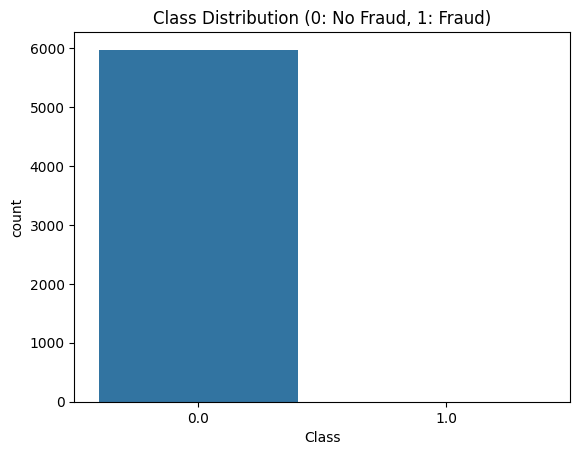

In [4]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.show()

### 3.2 Transaction Amount vs. Time
By plotting the transaction amount against time, we can observe any patterns or anomalies that might indicate fraudulent activity.

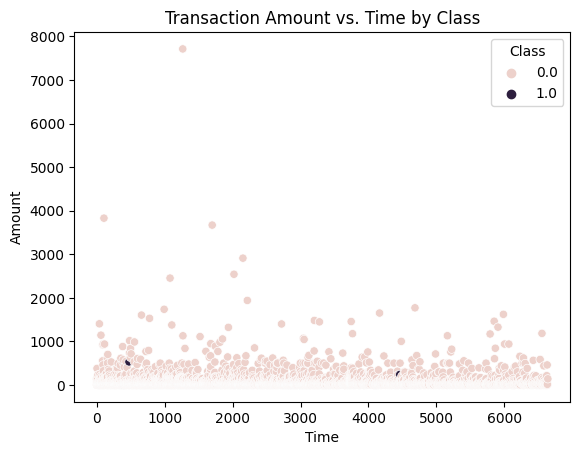

In [5]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data)
plt.title('Transaction Amount vs. Time by Class')
plt.show()

### 3.3 Correlation Among Features <a name="correlation-among-features"></a>
A heatmap of correlations can provide insights into which features are strongly related to each other, helping in feature selection for machine learning models.

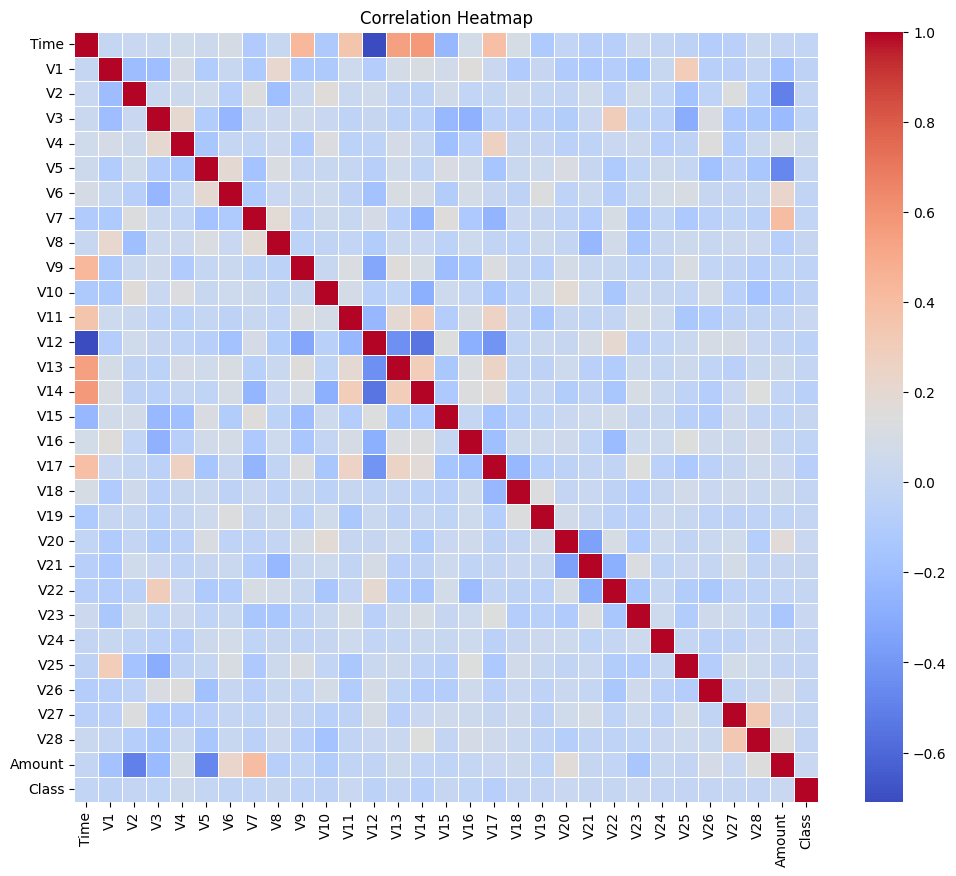

In [6]:
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 3.4 Transaction Amount by Class
Boxplots can provide a clear summary of the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.

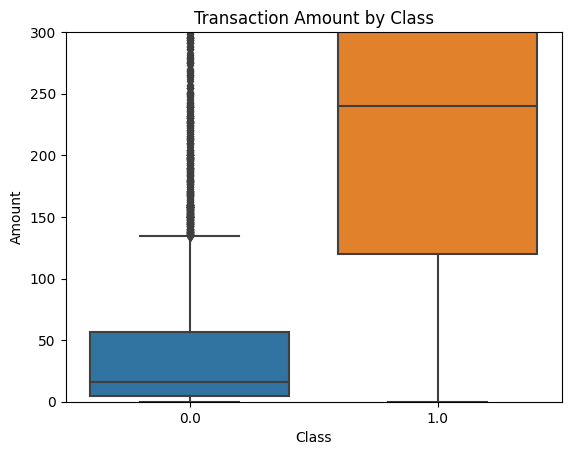

In [7]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount by Class')
plt.ylim(0, 300)  # Limiting the y-axis to better visualize the data
plt.show()


### 3.5 Transaction Amount Distribution by Class
A KDE plot can help us understand the density and distribution of transaction amounts for each class.

<ipython-input-8-fc7a2b8fb653>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud['Amount'], label='Fraud', shade=True)
<ipython-input-8-fc7a2b8fb653>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud['Amount'], label='No Fraud', shade=True)


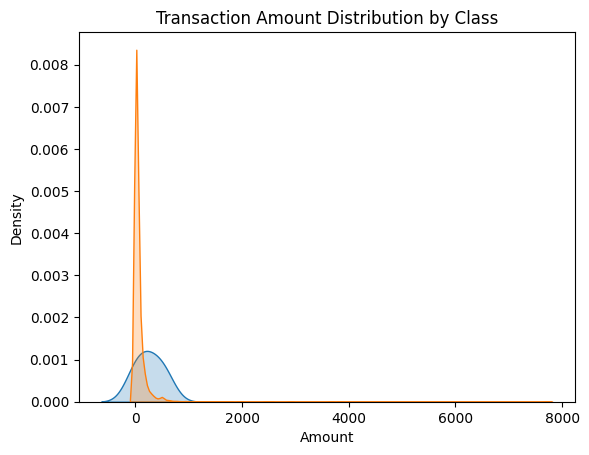

In [8]:
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

sns.kdeplot(fraud['Amount'], label='Fraud', shade=True)
sns.kdeplot(non_fraud['Amount'], label='No Fraud', shade=True)
plt.title('Transaction Amount Distribution by Class')
plt.show()


### Conclusion

Through our meticulous exploration of the Credit Card Fraud Detection dataset, several key insights have emerged:

Class Imbalance: The stark imbalance between fraudulent and non-fraudulent transactions underscores the challenge of detecting rare events. This imbalance necessitates careful consideration when building predictive models to ensure they don't merely predict the majority class.

Temporal Patterns: While the dataset doesn't show pronounced temporal patterns, subtle trends might emerge with more granular data or over extended periods. This suggests the importance of continuous monitoring and updating of models to capture evolving fraud patterns.

Feature Interrelationships: The correlation heatmap revealed intricate relationships between various features. Some features might be more informative than others, and some might carry redundant information. This interplay can be crucial when selecting features for modeling.

Transaction Amounts: The distribution of transaction amounts provided insights into typical transaction behaviors for both classes. Fraudulent transactions, while rare, have distinct patterns that can be leveraged for detection.

